In [5]:
import numpy as np 
import matplotlib.pyplot as plt

**Q:** *Given a table of data, how can we compute the derivative of some measurment?*

**A:** Use the definition of the derivative! 
\begin{equation}
\frac{df}{dx} = \lim_{h\to 0} \frac{f(x+h)-f(x)}{h}
\end{equation}

The catch: You can't actually take the limit. The resolution of your "experimental derivative" is limited by the data you have. 

From an algorithmic perspective, numerical methods for determining the derivative of some data/function all stem from power series approximations. For example, consider the Taylor series approximation to a smooth function $f(x)$ about the point $x=x_0$, i.e. 
\begin{equation}
f(x) = \sum_{k=0}^{\infty}\frac{f^{(k)}(x_0)}{k!}\left(x-x_0\right)^k
\end{equation}
The nob that we are allowed to control is how closely (or widely) we sample data. With this in mind, let's make the substitution $x-x_0 = h$. This leads to the following 
\begin{equation}
f(x_0+h) = \sum_{k=0}^{\infty} \frac{f^{(k)}(x_0)}{k!}h^k
\end{equation}
Noting that $x$ and $x_0$ are just names, we make the final substitution $x_0\to x$ in order to get the desired result, i.e. a series which tells us how to compute $f(x+h)$ given information about $f(x)$: 
\begin{equation}
f(x+h) = \sum_{k=0}^{\infty}\frac{f^{(k)}(x)}{k!}h^k
\end{equation}
or in the more usefull *approximation* form, 
\begin{equation}
\boxed{f(x+h) = \sum_{k-0}^N\frac{f^{(k)}(x)}{k!}h^k+\mathcal{O}\left(h^{N+1}\right)}
\end{equation}

Now that we have an equation, for $f(x+h)$, we can cleverly combine terms to get an order $N$ approximation to the derivative: 

## Forward Difference Algorithm
\begin{equation}
f(x+h) = f(x) + hf'(x) + \mathcal{O}(2) \\ 
\end{equation}
\begin{equation}
\boxed{f_{fd}'(x) = \frac{f(x+h)-f(x)}{h}}
\end{equation}

In [23]:
# example: 
x = np.linspace(0, 2*np.pi, 1000) 
y = np.sin(x) 
y_fd = np.zeros_like(x) 
h = x[1]-x[0]

for i in range(len(x)-1): 
    y_fd[i] = (y[i+1]-y[i])/h

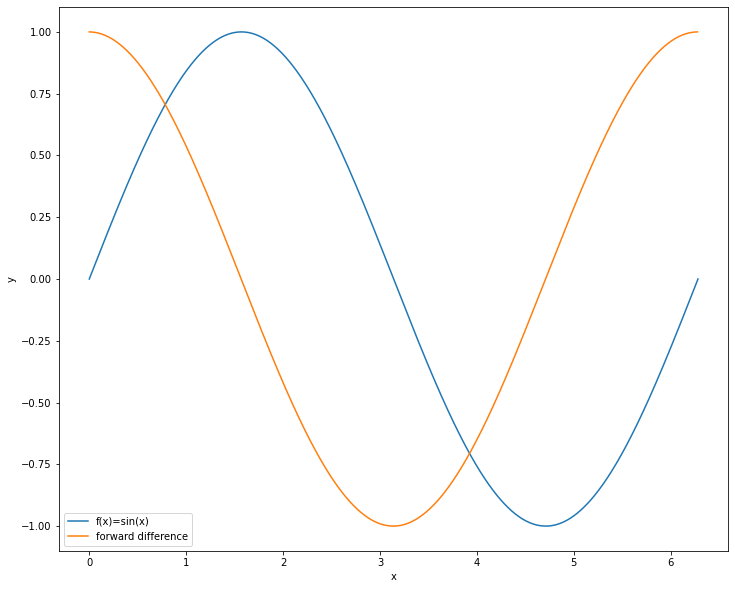

In [24]:
plt.figure(figsize=(12,10))
plt.plot(x,y, label='f(x)=sin(x)')
plt.plot(x[:-1], y_fd[:-1], label='forward difference')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# Central Difference Algorithm
To get a better handle on the error of the forward-difference algorithm, we could instead try to shift the forward difference formula to be more symmetric, e.g. take 
\begin{align}
f_{cd}'(x) &= \frac{f(x+h)-f(x-h)}{2h} \\
&\textrm{or} \\ 
f_{cd}'(x) &= \frac{f(x+h/2)-f(x-h/2)}{h}
\end{align}

We could develop these formulas by combining our Taylor series expansions for $f(x\pm h)$

In [25]:
y_cd = np.zeros_like(x) 

for i in range(1, len(x)-1): 
    y_cd[i] = (y[i+1]-y[i-1])/(2*h)

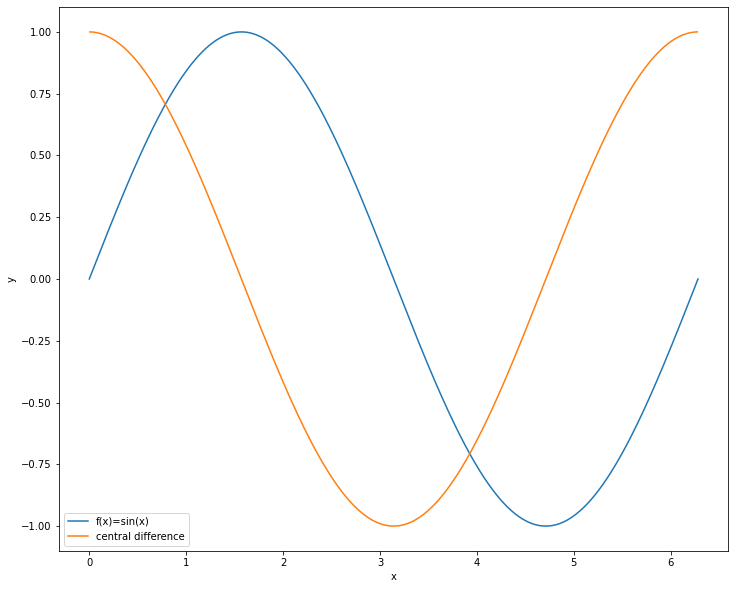

In [26]:
plt.figure(figsize=(12,10))
plt.plot(x,y, label='f(x)=sin(x)')
plt.plot(x[1:-1], y_cd[1:-1], label='central difference')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# Second derivatives

To compute the second derivative of a fucntion, we can take the central difference of the central difference: 
\begin{align}
f_{cd}'(x) &= \frac{f(x+h/2)-f(x-h/2)}{h} \\
f_{cd}''(x)&= \frac{f_{cd}'(x+h/2)-f_{cd}'(x-h/2)}{h} \\
&= \frac{f(x+h)+f(x-h)-2(f(x)}{h^2}
\end{align}

\begin{equation}
\boxed{f_{cd}''(x) = \frac{f(x+h)+f(x-h)-2f(x)}{h^2}}
\end{equation}






In [49]:
def f(x): 
    return np.cos(x)*np.exp(-0.25*x) 


x = np.linspace(0, 10, 1000) 
h = x[1]-x[0]
f_1 = [] 
x_1 = x[1:-1]
f_2 = [] 
x_2 = x[1:-1]

for i in range(1, len(x)-1):
    f_1.append((f(x[i+1])-f(x[i-1]))/(2*h))
    f_2.append((f(x[i+1])+f(x[i-1])-2*f(x[i]))/(h**2))
    
f_1 = np.array(f_1)
f_2 = np.array(f_2)

print(f_1.shape, f_2.shape, x_1.shape, x_2.shape)

(998,) (998,) (998,) (998,)


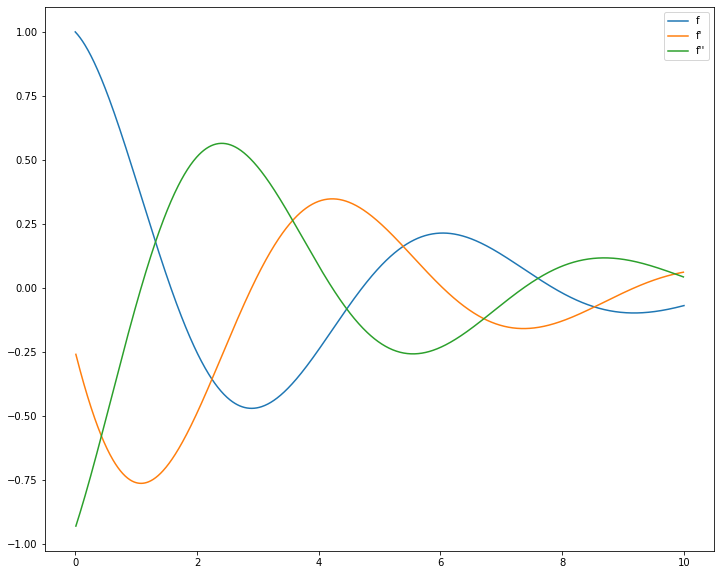

In [52]:
plt.figure(figsize=(12,10))
plt.plot(x, f(x), label='f')
plt.plot(x_1, f_1, label='f\'')
plt.plot(x_2, f_2, label='f\'\'')
plt.legend()
plt.show()